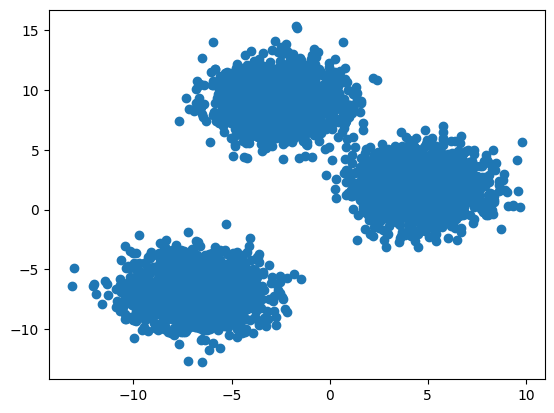

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist


# Generate data and visualize
X, y = datasets.make_blobs(n_samples=5000, centers=3, n_features=2, cluster_std = 1.6,
random_state=42)
plt.scatter(X[:,0],X[:,1])
plt.show()

df  = pd.DataFrame((np.concatenate((X, y.reshape(5000,1)), axis = 1)))


In [122]:
def visualize_Kmeans(n_clusters, init = "k-means++", n_init = 'auto'):
    kmeans = KMeans(n_clusters = n_clusters, init = init)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    centroids = kmeans.cluster_centers_
    fig = plt.figure()
    plt.scatter(X[:,0], X[:,1], c = y_pred)
    plt.scatter(centroids[:,0], centroids[:,1], c = 'red')

    return fig


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


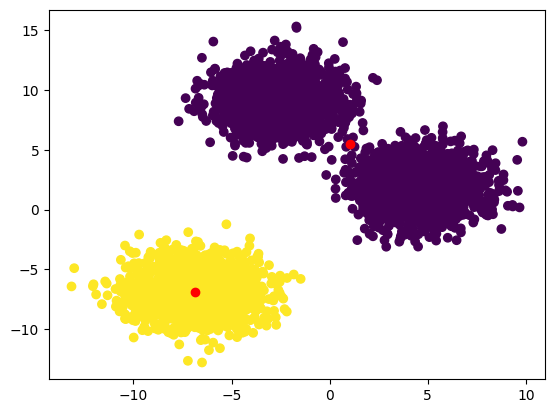

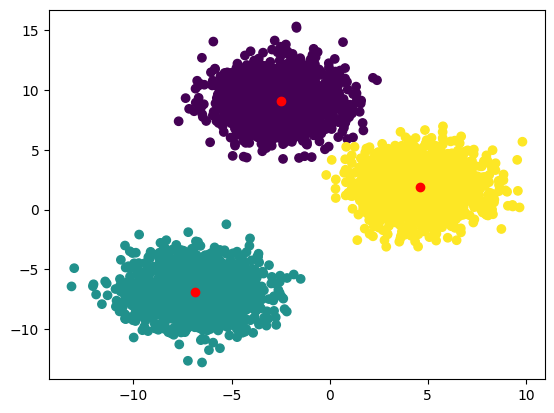

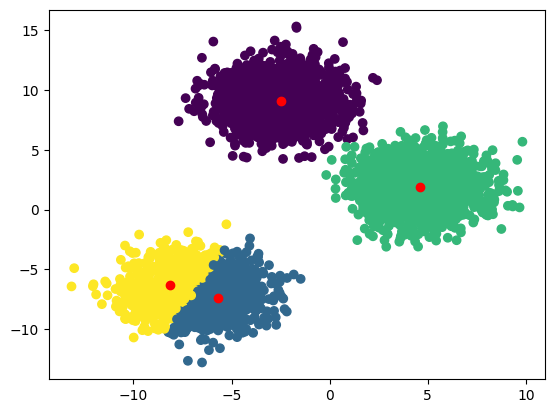

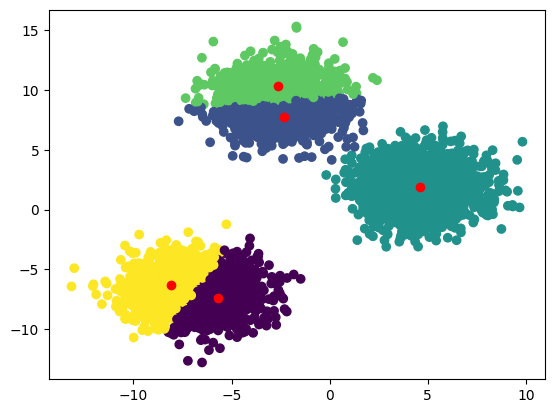

In [123]:
for i in range(2,6):
    visualize_Kmeans(n_clusters = i, init = "k-means++", n_init = 'auto')

# Choose K in K-Means algorithm

## Elbow Method:

Elbow method: chọn k dựa trên sự biến đổi của SSE. Chọn k ở điểm elbow.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

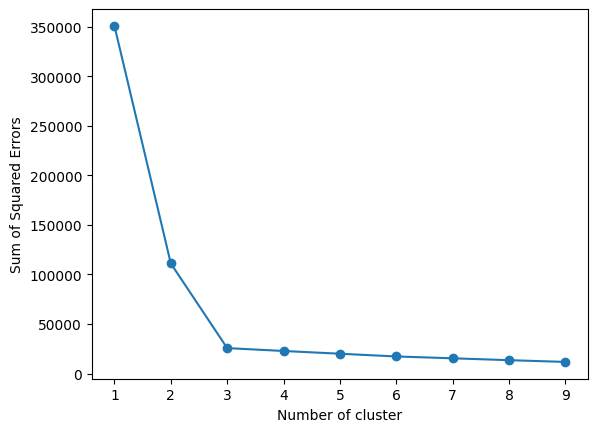

In [128]:
# Elbow method

sse = []
list_k = list(range(1,10))
for k in list_k:
    kmeans = KMeans(n_clusters=k, init= "k-means++", max_iter=1000).fit(X)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure()
plt.plot(list_k, sse, '-o')
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Squared Errors")
plt.show()



## Silhouette method

Silhouette method xác định độ phân chia (separation) giữa các clusters.
* $ a_i $: average distance from all data points in the same clusters
* $ b_i$: average distance from all data points in the closest clusters

Silhouette coefficient $ = \frac{a_i - b_i}{max(a_i, b_i)}$

Silhouette coefficient thuộc đoạn [-1,1]

* = 0 , điểm i rất gần neighboring clusters
* = 1 , điểm i cách rất xa các clusters
* = -1, sai

For n_clusters = 2 The average silhouette_score is : 0.6539133882256739
For n_clusters = 3 The average silhouette_score is : 0.7467286086663069
For n_clusters = 4 The average silhouette_score is : 0.5831402940345072
For n_clusters = 5 The average silhouette_score is : 0.44163821190999253
For n_clusters = 6 The average silhouette_score is : 0.4375658847522754


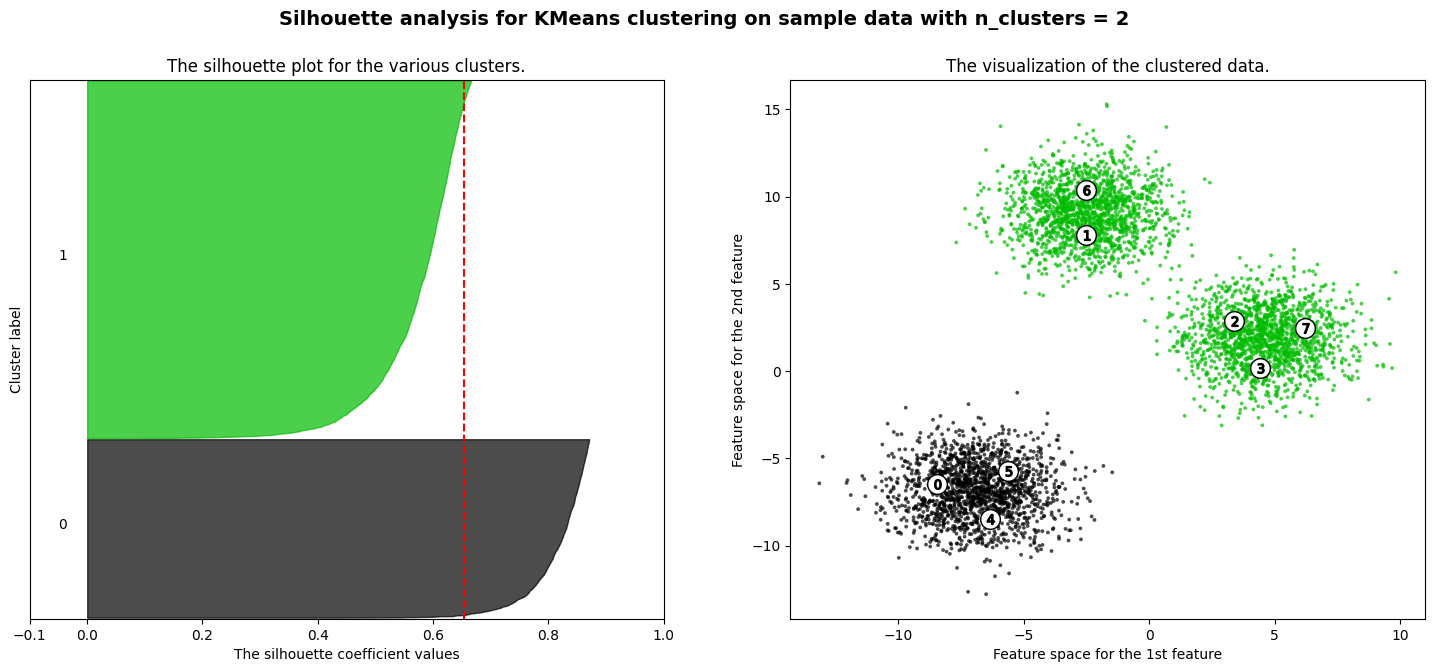

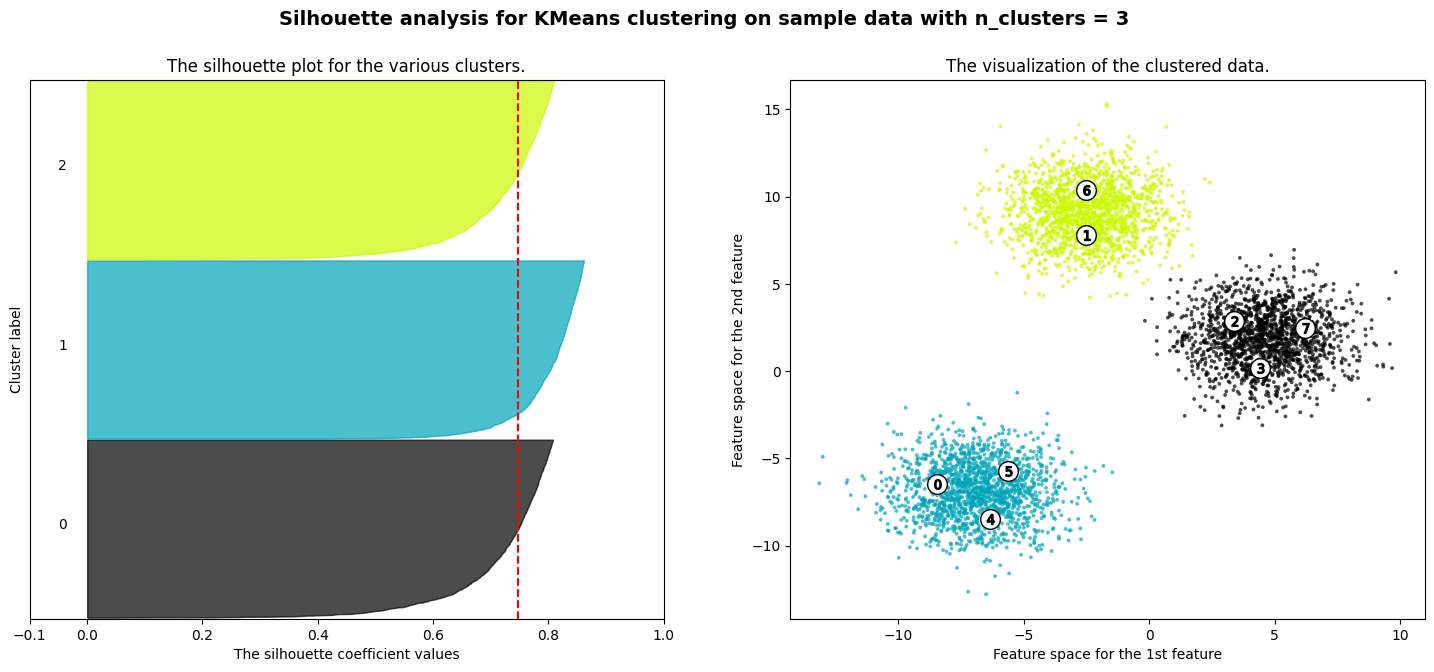

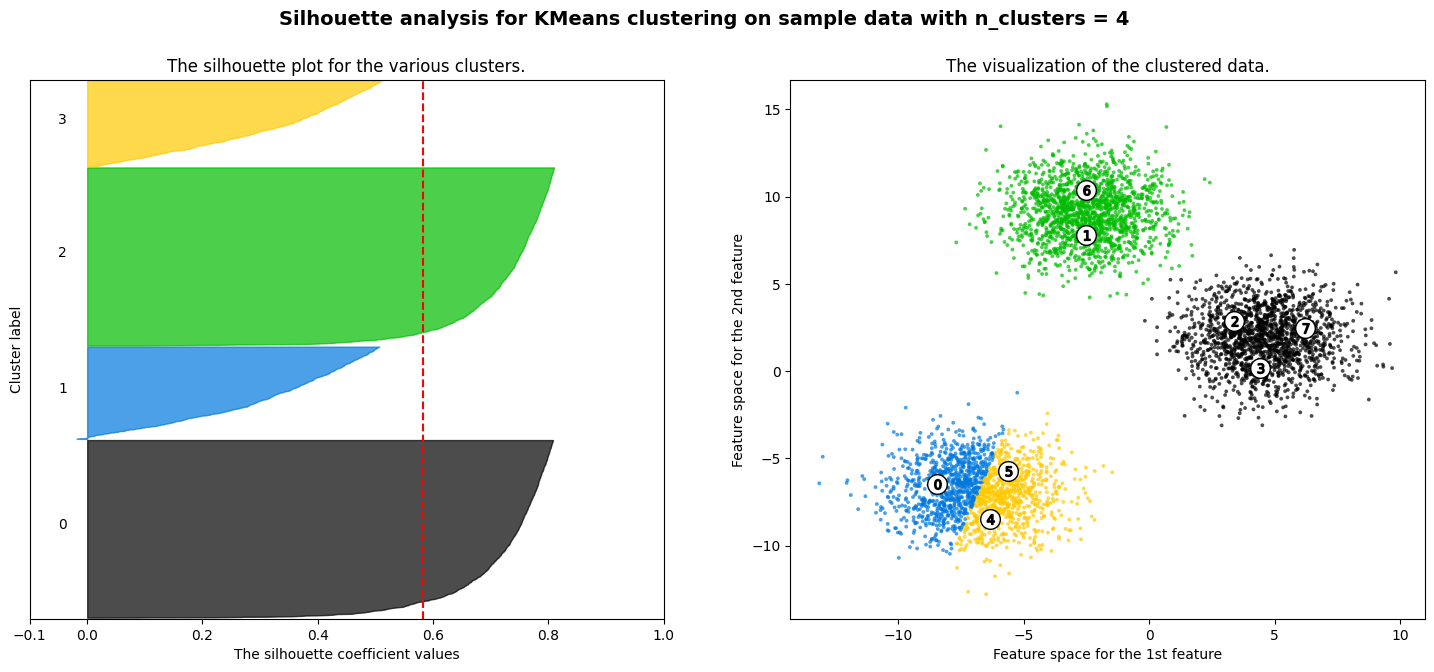

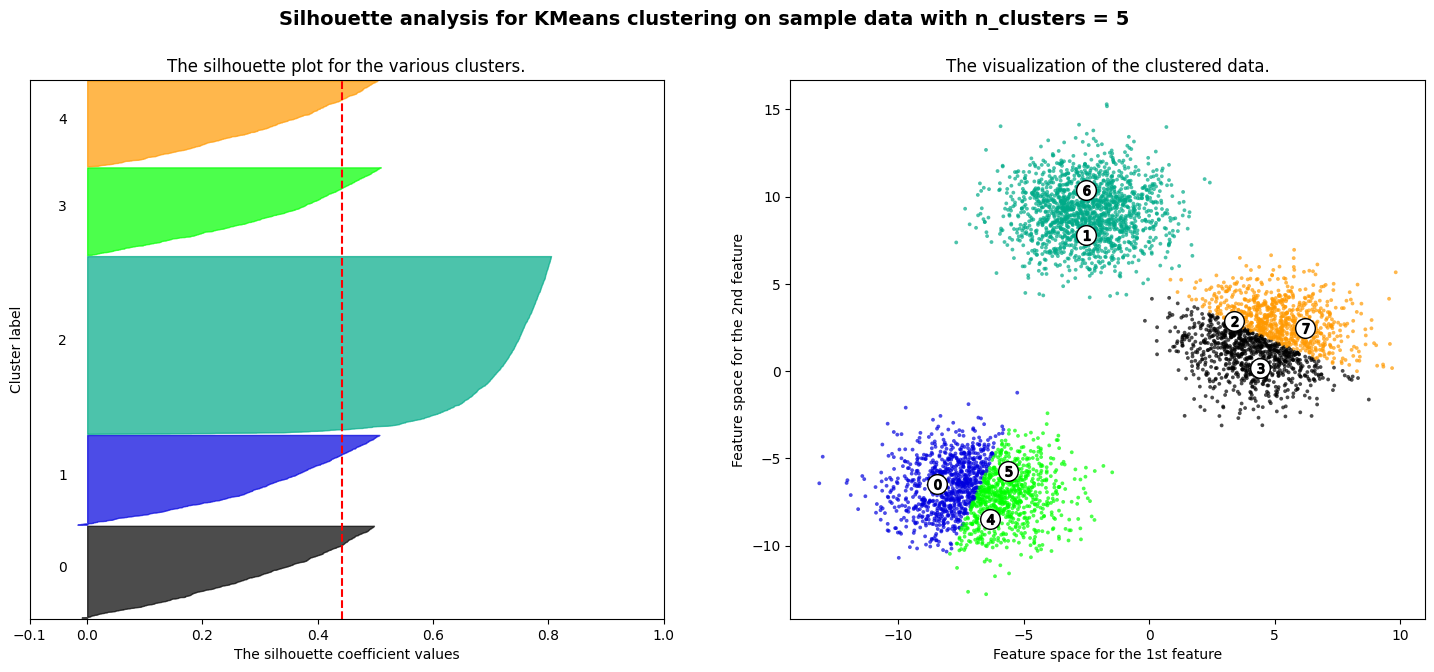

In [139]:
# Silhouette method

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 7)
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusters = KMeans(n_clusters = n_clusters, init = 'k-means++', n_init = 'auto', random_state = 42)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg,)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

* n = 4 là bad pick vì cluster 1 và 3 nhỏ hơn Silhouette scores
* n = 2,5,6 không phải là lựa chọn tốt nhất vì tồn tại 1 cluster có size to hơn các cluster còn lại
* n = 3, các clusters có similar size nên là **best-k**